In [1]:
from astropy import stats
import scipy.ndimage
import numpy as np
%matplotlib inline
import pylab as plt
plt.rcParams['image.origin'] = 'lower'
import glob
from astropy.io import fits
from astropy import visualization
from astropy import coordinates, units as u
from astropy.table import Table, Column
from astropy import table
from astropy import wcs
from astroquery.vizier import Vizier
from astroplan import FixedTarget
from astroplan.plots import plot_finder_image
from astroquery.simbad import Simbad
Simbad.reset_votable_fields()
Simbad.add_votable_fields('flux(V)', 'flux(B)', 'flux(I)', 'otype')


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


In [2]:
name1 = glob.glob('gc_*.fits')
name2 = [fits.getdata(x) for x in name1]

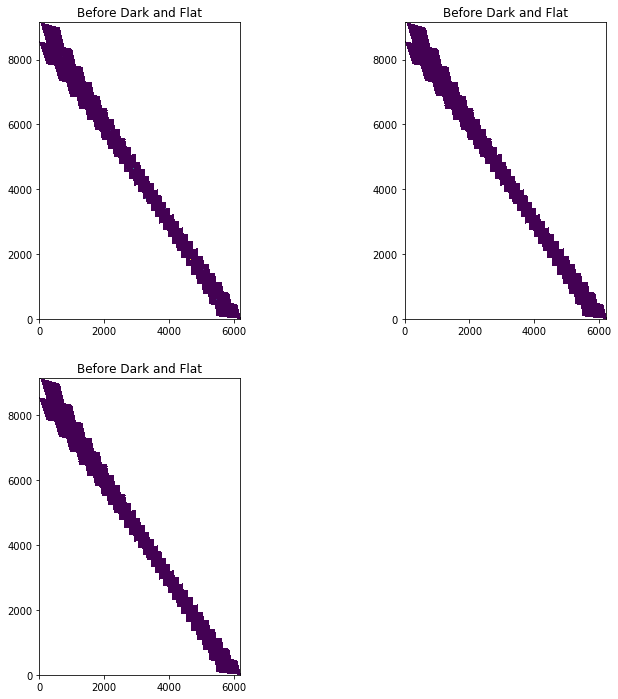

In [3]:
plt.figure(figsize=(12,12))

for ii in range(3):
    ax = plt.subplot(2,2,ii+1)
    ax.imshow(name2[ii], origin='lower', vmax=2500, vmin=500)
    ax.set_title("Before Dark and Flat")

In [4]:
header1 = fits.getheader(name1[0])
header2 = fits.getheader(name1[1])
header3 = fits.getheader(name1[2])
ww = wcs.WCS(header1)

In [5]:
tlx, tly = ww.wcs_pix2world(2.5, 2.5, 0)
brx, bry = ww.wcs_pix2world(3.5, 1.5, 0)
tlx,tly

(array(332.33619089), array(-52.3280205))

In [6]:
ra1, dec1 = ww.wcs_pix2world(137,81,0)
center1 = coordinates.SkyCoord(ra1, dec1, frame='fk5', unit=(u.deg, u.deg))
calstar = Simbad.query_region(center1, radius=5000*u.arcsec)
calstar

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,FLUX_V,FLUX_B,FLUX_I,OTYPE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mag,mag,mag,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float32,float32,float32,object
TYC 8809-322-1,22 03 58.6323,-52 45 27.066,14,14,0.052,0.065,90,A,O,2018yCat.1345....0G,11.858,12.362,--,Star
LEDA 439158,22 04 11.9,-52 45 14,5,5,--,--,0,D,O,2003A&A...412...45P,--,--,--,Galaxy
2MASX J22041290-5245410,22 04 12.9166,-52 45 41.161,14,14,1.038,1.289,90,C,O,2018yCat.1345....0G,--,16.66,--,Galaxy
6dFGS gJ220357.3-524420,22 03 57.1,-52 44 20,5,5,--,--,0,D,O,2003A&A...412...45P,--,16.59,--,Galaxy
Str 2201-530,22 04,-52.8,2,2,--,--,0,E,,,--,--,--,ClG
LSQ 14dus,22 03 44.68,-52 43 19.8,6,6,--,--,0,D,,2014ATel.6398....1E,--,--,--,SN
LEDA 440124,22 03 53.8,-52 41 27,5,5,--,--,0,D,O,2003A&A...412...45P,--,--,--,Galaxy
DES J220346.27-524201.2,22 03 46.280,-52 42 01.27,7,7,--,--,0,C,O,2018ApJS..239...18A,--,--,--,Candidate_RRLyr


In [99]:
indices = []
for ii in range(9142):
    for jj in range(6202):
        if not np.isnan(name2[0][ii][jj]):
            indices.append([ii,jj])